## Homework 2

**Submitted by : Tanvi Arora**   
**Section     : DS 7337 Natural Language Processing - 401**

<a id="top"></a>
### Contents

* <a href="#Webscraping">Web Data Fetch</a>
* <a href="#VocabNormalize">Problem 1 : Scoring and Normalizing Vocabulary size </a>
* <a href="#LongWordsVocabNormalize">Problem 2 : Scoring and Normalizing Long-words Vocabulary size</a>
* <a href="#TextDifficultyScore">Problem 3 : Text-Difficulty score</a>
* <a href="#TextScoring">Text-scoring All Methods</a>
* <a href="#FunctionCall">Calling all functions</a>
* <a href="#TextScoreAnalysis">Text Score Analysis </a>

In [65]:
import platform
print(platform.platform())

import sys
print("Python",sys.version)

import nltk
from nltk.tokenize import regexp_tokenize
print("nltk",nltk.__version__)

from bs4 import BeautifulSoup
import requests
import urllib
import re
import pandas as pd
from tabulate import tabulate
from urllib import request
from __future__ import division, unicode_literals
from math import sqrt
import matplotlib.pyplot as plt

MIN_CHAR_LEN=15

Windows-10-10.0.17134-SP0
Python 3.7.0 (default, Jun 28 2018, 08:04:48) [MSC v.1912 64 bit (AMD64)]
nltk 3.4.1


<a id="Webscraping"></a>
<a href="#top">Back to Top</a>
### Reusable functions to read webpage

In [58]:
## returns webpage content if web page accessible else None
def getSoup(url):
    grab_page = requests.get(url,timeout=5)
    if grab_page.status_code != 200:
        return None
    else:
        return BeautifulSoup(grab_page.content, "html5lib")

## returns bookname in proper format and link of the format requested
## input : beautiful soup page content, bookformat : "html" or "utf8"
def getBookdetails(childsoup,bookformat):
    bookname=[]
    
    child_body = child_soup.find('div', id="download")
    link_table = child_body.table
    ## get title of book
    metalist=child_soup.head.find_all("meta")
    
    for m in metalist:
        if m.get("name", None) == "title":
            bookname.append(m.get("content", None))
    
    if bookformat=="html":
        booktype="text/html"
    elif bookformat=="utf8":
        booktype="text/plain"
    
    #htmllinklist=[]
    #utf8linklist=[]
    ## get book links
    for l in link_table.find_all('tr'):
        column=l.find_all('td')
        for rc in column:
            booklinktag = rc.findAll(title="Download", type=re.compile(booktype))
            if (booklinktag):
                for h in booklinktag:
                    if(h.attrs["href"]):
                        #htmllinklist.append(h.attrs["href"])
                        booklink= h.attrs["href"]
                    else:
                        booklink=None

    #print(bookname)
    return bookname,booklink


## basic beautiful soup read function 
def read_html(url):
    html = request.urlopen(url).read().decode('utf8')
    raw = BeautifulSoup(html, 'html.parser').get_text()
    tokens = word_tokenize(raw)
    text = nltk.Text(tokens)
    return text

## basic utf8 text read function using requests
def read_utf8(url):
    response = request.urlopen(url)
    raw = response.read().decode('utf8')
    tokens = nltk.word_tokenize(raw)
    text = nltk.Text(tokens)
    return text


## returns utf8 link book content only
## book content considered as all text between CONTENTS and End Of Project license
def read_utf8_contentonly(url):
    response = request.urlopen(url)
    raw = response.read().decode('utf8')
    start=raw.find("CONTENTS")
    if start== -1:
        start=0
    #print(start)    
    if raw.rfind("End of the Project Gutenberg") != -1:
        end=raw.rfind("End of the Project Gutenberg")
    elif raw.rfind("End of Project Gutenberg's") != -1:
        end=raw.rfind("End of Project Gutenberg's")
    elif raw.rfind("END OF THE PROJECT GUTENBERG") != -1:
        end=raw.rfind("END OF THE PROJECT GUTENBERG")
    
    if end == -1:
        end=len(raw)
        
    #print(end)
    tokens = nltk.word_tokenize(raw[start:end])
    text = nltk.Text(tokens)
    return text


#normalize words by removing numbers and punctuations and convert all words to lower case to remove duplicates later
def text_norm(text):
    words=[word.lower() for word in text if word.isalpha()]
    return words
    

# print tabular output
def tab_bookstats(book_pd):
    print(tabulate(book_pd, headers='keys', tablefmt='simple',showindex=False,))
    
def get_textbooks(url_list):
    text=[]
    for u in url_list:
        #print("http:"+u)
        #print("=====================================")
        text.append(text_norm(read_utf8_contentonly("http:"+u)))
    
    return text
    

<a id="VocabNormalize"></a>
<a href="#top">Back to Top</a>
### Normalization functions

In [132]:
## lexical diversity is a measure of how many different words that are used in a text
def lexical_diversity(text):
    return len(set(text))/len(text)

def percentage(word,text):
    return 100* text.count(word)/len(text)

## vocabulary is the list of distinct words used in a text
def vocab(tokens):
    return set(tokens)

## raw score is a normalized vocabularysize score having a range of values in 0,1
def get_raw_score(vocabsizelist):
    max_size=max(vocabsizelist)
    return [vc/max_size for vc in vocabsizelist]

## sqrt score is the sqrt of normalized score    
def get_sqrt_score(rawscorelist):
    return [sqrt(raw_sc) for raw_sc in rawscorelist]

## normalized final score
## returns average of sqrt score and rank score. 
## To note : sqrt score is a function of normalized vocab size
def get_norm_final_score(sqrt_score,rank_score):
    return (1/2)*(sqrt_score+rank_score)

<a id="LongWordsVocabNormalize"></a>
<a href="#top">Back to Top</a>
### Long-word scoring

In [60]:
## identify size of long-words in a text
## accepts min_char_len , length beyond which is considered as long-word
def get_long_words_vocab_size(text,min_char_len):
    long_words=[]
    words=set(text)
    long_words=[w for w in words if len(w) > min_char_len]
    return len(long_words)



<a id="TextDifficultyScore"></a>
<a href="#top">Back to Top</a>
### Text-difficulty score

In [61]:
## text difficulty score is the equal-weighted score of the 3 text scores
def get_text_difficulty_score(lex_div,norm_vocab,norm_long_words):
    return (1/3)*(lex_div+norm_vocab+norm_long_words)
    

<a id="TextScoring"></a>
<a href="#top">Back to Top</a>
### Text scoring function

In [133]:
'''
for a given list of texts, apply all text-score functions
returns a dataframe of utf8-link and below scores :
 i) lexical diversity
 ii)vocabulary size
 iii)raw score
 iv) sqrt score
 v) rank score
 vi) long words vocabulary size
 vii) long words raw score
 viii) long words sqrt score
 ix) long words rank score
 x) normalized vocab score
 xi) long words normalized vocab score
 xii) text difficulty score

for the long_Words detection, min_char_length is set to 15
'''
def get_text_scores(text_list):
    lexdiv_list=[]
    vocab_size_list=[]
    long_words_list=[]
    raw_score_list=[]
    long_words_raw_score_list=[]
    score_sqrt_list=[]
    long_words_score_sqrt_list=[]
    
    for t in text_list:
        lexdiv_list.append(lexical_diversity(t))
        vocab_size_list.append(len(vocab(t)))
        long_words_list.append(get_long_words_vocab_size(t,MIN_CHAR_LEN))
    
   
    raw_score_list=get_raw_score(vocab_size_list)
    long_words_raw_score_list=get_raw_score(long_words_list)
    
    score_sqrt_list=get_sqrt_score(raw_score_list)
    long_words_score_sqrt_list=get_sqrt_score(long_words_raw_score_list)
    
    book_df=pd.DataFrame({'utf8_link' : ullist,
                         'lexical_diversity' : lexdiv_list,
                         'vocab_size' : vocab_size_list,
                         'raw_score' : raw_score_list,
                         'score_sqrt' : score_sqrt_list,
                         'long_words' : long_words_list,
                         'long_words_raw_score' : long_words_raw_score_list,
                         'long_words_score_sqrt' : long_words_score_sqrt_list})

    # higher rank is given to the book with more vocab_size

    book_df['rank_score']=book_df["vocab_size"].rank(ascending=0,method='average')
    book_df['long_words_rank_score']=book_df["long_words"].rank(ascending=0,method='average')
    book_df['norm_final_score']=book_df.apply(lambda row : get_norm_final_score(row['score_sqrt'], row['raw_score']), axis=1 )
    book_df['long_words_norm_final_score']=book_df.apply(lambda row : get_norm_final_score(row['long_words_score_sqrt'], row['long_words_raw_score']), axis=1 )
    book_df['text_difficulty_score']=book_df.apply(lambda row : get_text_difficulty_score(row['lexical_diversity'], row['norm_final_score'], row['long_words_norm_final_score']), axis=1 )
    
    return book_df

    
### combined function to fetch book links and get their text scores
def text_scores(url_list):
    textlist=[]
    textlist=get_textbooks(url_list)
    return get_text_scores(textlist)
    

<a id="FunctionCall"></a>
<a href="#top">Back to Top</a>
### Main program

In [10]:
# call the main URL
soup=getSoup("http://www.gutenberg.org/wiki/Children%27s_Instructional_Books_(Bookshelf)")

In [11]:
c=[main.text for main in soup.find_all(class_=re.compile("toctext"))]
    
for child in c:
    print(child)

Readers
Misc.
Graded Readers
Poetry Readers
Readers for English Speakers Learning Other Languages
Non-English Readers
About Readers
Science and Nature
History
Geography
Uncategorized


In [12]:
# Extract book links from the main web page
booklink=[l.attrs["href"]  for l in soup.find(class_="mw-parser-output").find_all('a',class_="extiw")]

In [13]:
len(booklink)

104

In [15]:
#Get 'UTF-8' format book links for each of the book
bnlist=[]
ullist=[]

for l in booklink:
    #print("http"+l)
    #print("======================================================")
    child_soup=getSoup("http:"+l)
    bn,ul=getBookdetails(child_soup,'utf8')
    bnlist.append(bn)
    ullist.append(ul)

if len(bnlist)==len(booklink):
    print("We are good to go")
else:
    print("some links maybe broken")

We are good to go


In [16]:
# get all texts for text books to minimize web read

textbooks=[]
textbooks=get_textbooks(ullist)

if len(textbooks)==len(bnlist):
    print("We are good to go")
else:
    print("some links maybe broken")

We are good to go


In [112]:
# perform score functions on the text books data
book_textscores_df=get_text_scores(textbooks)

In [145]:
book_textscores_df["bookname"] = bnlist
book_textscores_viz_df=  book_textscores_df.loc[:,["bookname","lexical_diversity","norm_final_score","long_words_norm_final_score","text_difficulty_score"]]
print(tabulate(book_textscores_viz_df, headers='keys', tablefmt='simple',showindex=False,))

bookname                                                                                   lexical_diversity    norm_final_score    long_words_norm_final_score    text_difficulty_score
---------------------------------------------------------------------------------------  -------------------  ------------------  -----------------------------  -----------------------
['A Primary Reader: Old-time Stories, Fairy Tales and Myths Retold by Children']                   0.101331            0.149915                       0                        0.0837487
['The Bird-Woman of the Lewis and Clark Expedition by Katherine Chandler']                         0.121435            0.189426                       0                        0.103621
["Dr. Scudder's Tales for Little Readers, About the Heathen. by John Scudder"]                     0.108801            0.42808                        0                        0.17896
['The Louisa Alcott Reader: a Supplementary Reader for the Fourth Year of Scho

<a id="TextScoreAnalysis"></a>
<a href="#top">Back to Top</a>
### Text score Analysis

#### Top 5 books with highest lexical diversity

In [147]:
book_textscores_viz_df.sort_values(by=["lexical_diversity"], axis=0 , ascending=False  ) \
                      .head(5)[["bookname","lexical_diversity"]]

,bookname,lexical_diversity
81,[A Manual of Pronunciation by Otis Ashmore],0.563611
10,[Little Present by Unknown],0.498778
48,[Child's Book of Water Birds by Anonymous],0.496183
46,[Book about Animals by Rufus Merrill],0.426856
56,[The History of Insects by Unknown],0.369608


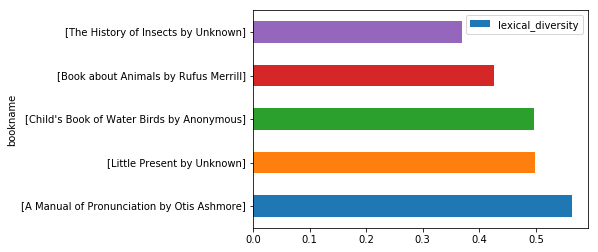

In [148]:
book_textscores_viz_df.sort_values(by=["lexical_diversity"], axis=0 , ascending=False  ) \
                      .head(5) \
                      .plot(kind='barh', x='bookname' , y='lexical_diversity')

*_Highest lexical diversity is close to 0.6 , looking at top 5 books based on their lexical diversity, they are quiet close_*

#### Top 5 books with highest normalized vocabulary score

In [149]:
book_textscores_viz_df.sort_values(by=["norm_final_score"], axis=0 , ascending=False  ) \
                      .head(5)[["bookname","norm_final_score"]]

,bookname,norm_final_score
21,[McGuffey's Sixth Eclectic Reader by William H...,1.000000
26,"[The Ontario Readers: The High School Reader, ...",0.964090
71,"[A Modern History, From the Time of Luther to ...",0.941075
29,[Sanders' Union Fourth Reader by Charles W. Sa...,0.883584
20,[McGuffey's Fifth Eclectic Reader by William H...,0.836608


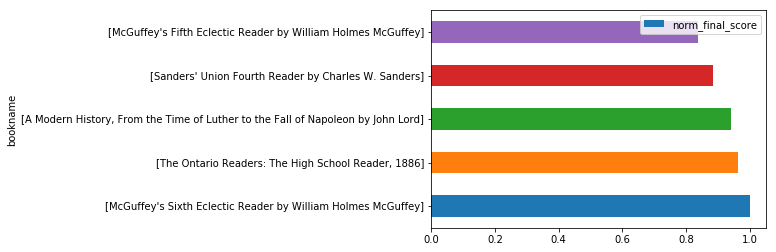

In [150]:
book_textscores_viz_df.sort_values(by=["norm_final_score"], axis=0 , ascending=False  ) \
                      .head(5) \
                      .plot(kind='barh', x='bookname' , y='norm_final_score')

*_Normalized score is between 0 and 1 , and is based on the list of books being considered, so highest value obtained is 1 definitely. Looking at the top 5 books based on normalized vocabulary score, they are quiet close to each other. However interesting to note is the books with top 5 normalized vocabulary size are different than the top 5 books based on the lexical diversity_*

#### Top 5 books with highest normalized long-word vocabulary score

In [151]:
book_textscores_viz_df.sort_values(by=["long_words_norm_final_score"], axis=0 , ascending=False  ) \
                      .head(5)[["bookname","long_words_norm_final_score"]]

,bookname,long_words_norm_final_score
53,[Dierenleven in de wildernis by William J. Long],1.000000
96,[Leçons de cosmographie by Adrien Guilmin],0.534969
71,"[A Modern History, From the Time of Luther to ...",0.511509
26,"[The Ontario Readers: The High School Reader, ...",0.413751
38,[First Italian Readings by Various],0.334679


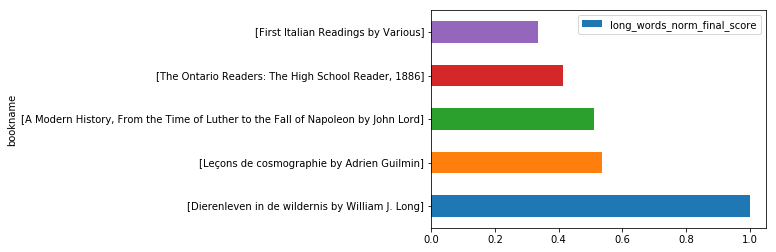

In [152]:
book_textscores_viz_df.sort_values(by=["long_words_norm_final_score"], axis=0 , ascending=False  ) \
                      .head(5) \
                      .plot(kind='barh', x='bookname' , y='long_words_norm_final_score')

*_We have considered 15 char length as the lower limit of long-words . This analysis may change if the minimum length criteris is changed, more for the lower value than the higher. Normalized score is between 0 and 1 , and is based on the list of books being considered, so highest value obtained is 1 definitely. Looking at the top 5 books based on long-words normalized vocabulary score, it is a skewed plot with 1 book having the maximum number of long-words and second book to top it has 40% less long words. Also interesting to note is the books with top 5 long-words normalized vocabulary size are different than the top 5 books based on the lexical diversity but these have some common traits with the top 5 books of normalized vocabulary score_*

#### Top 5 books with highest text-difficulty score

In [153]:
book_textscores_viz_df.sort_values(by=["text_difficulty_score"], axis=0 , ascending=False  ) \
                      .head(5)[["bookname","text_difficulty_score"]]

,bookname,text_difficulty_score
53,[Dierenleven in de wildernis by William J. Long],0.546166
71,"[A Modern History, From the Time of Luther to ...",0.504069
26,"[The Ontario Readers: The High School Reader, ...",0.494623
38,[First Italian Readings by Various],0.480042
21,[McGuffey's Sixth Eclectic Reader by William H...,0.438256


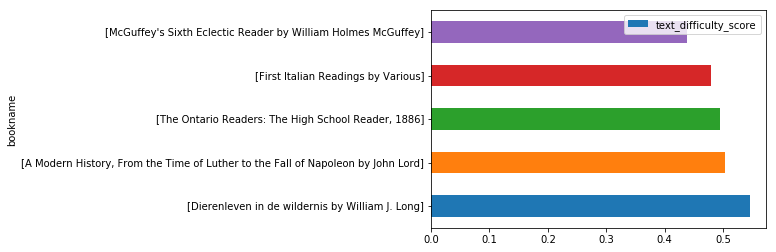

In [154]:
book_textscores_viz_df.sort_values(by=["text_difficulty_score"], axis=0 , ascending=False  ) \
                      .head(5) \
                      .plot(kind='barh', x='bookname' , y='text_difficulty_score')

*_Text difficulty score tend to be biased towards the normalized vocabulary scores for all words plus long-words.None of the books with top lexical diversity are in the list of top 5 books with high difficulty score. As we know from our previous analysis that the 2 normalized scores have ranges , they affect the text difficulty score. But the text difficulty score is in the range similar to lexical diversity i.e. 0 to 0.6 and the top 5 books are not to far away from each other._*

### Summarized view of all scores for all books

In [155]:
book_textscores_viz_df["book#"]=list(book_textscores_viz_df.index)

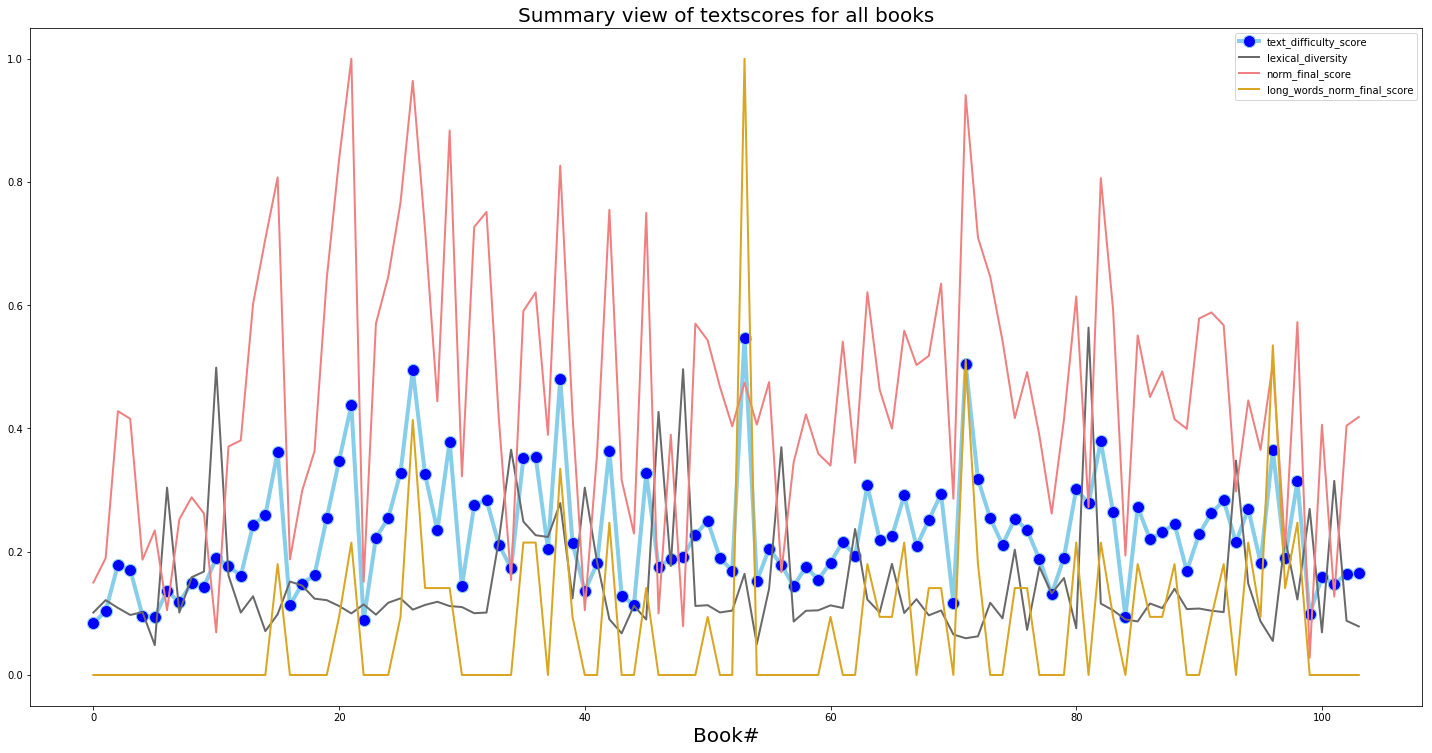

In [156]:

# multiple line plot
plt.figure(figsize=(20,10))
plt.plot( 'book#', 'text_difficulty_score', data=book_textscores_viz_df, marker='o', markerfacecolor='blue', markersize=12, color='skyblue', linewidth=4)
plt.plot( 'book#', 'lexical_diversity', data=book_textscores_viz_df, marker='', color='dimgrey', linewidth=2)
plt.plot( 'book#', 'norm_final_score', data=book_textscores_viz_df, marker='', color='lightcoral', linewidth=2)
plt.plot( 'book#', 'long_words_norm_final_score', data=book_textscores_viz_df, marker='', color='goldenrod', linewidth=2)
plt.tight_layout()
plt.title("Summary view of textscores for all books",fontsize=20)
plt.xlabel("Book#", fontsize=20)
plt.legend()


**From the graph above**

1) For most of the books, normalized vocabulary score is high as compared to their lexical diversity. There are few exceptions though where lexical diversity is higher than the normalized vocabulary score. These are the books that are rich in their lexical diversity individually but when compared with other books on the Gutenberg project, these are not as rich in vocabulary.

2) The book with highest text difficulty score has lower lexical diversity but a very high long words raw score, i.e. uses a lot of long words ( words with length > 15 ). This increases its text difficulty level. Similarly there are books with 0 long-words , per our pre-assumed long-word length as 15 characters. This brings down its text difficulty score when compared to other books. This can change if our pre-assumed long-word length changes.

3) To be noted there are many books that do not have words that are larger than 15 characters